In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq
import numpy as np

In [2]:
# List all files in the data directory for verification
data_path = os.path.join(os.getcwd(), "data")
print('Data directory:', data_path)
classes_folders_list = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]
for class_folder in classes_folders_list:
    folder_path = os.path.join(data_path, class_folder)
    print(f"Class folder: {class_folder}")
    files_in_folder = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for file_name in files_in_folder:
        print(f" - {file_name}")

Data directory: g:\Other computers\My Computer\8 Εξάμηνο\Αλγοριθμικές Θεμελιώσεις Δικτύων Αισθητήρων\Human Gesture Recognition Project\data
Class folder: class_A
 - data_A_1.csv
 - data_A_2.csv
 - data_A_3.csv
 - data_A_4.csv
 - data_A_5.csv
 - data_A_6.csv
 - data_A_7.csv
 - data_A_8.csv
 - data_A_9.csv
 - data_A_10.csv
 - data_A_11.csv
 - data_A_12.csv
 - data_A_13.csv
 - data_A_14.csv
 - data_A_15.csv
 - data_A_16.csv
 - data_A_17.csv
 - data_A_18.csv
 - data_A_19.csv
 - data_A_20.csv
 - data_A_21.csv
 - data_A_22.csv
 - data_A_23.csv
 - data_A_24.csv
 - data_A_25.csv
 - data_A_26.csv
 - data_A_27.csv
 - data_A_28.csv
 - data_A_29.csv
 - data_A_30.csv
 - data_A_31.csv
 - data_A_32.csv
 - data_A_33.csv
 - data_A_34.csv
 - data_A_35.csv
 - data_A_36.csv
 - data_A_37.csv
 - data_A_38.csv
 - data_A_39.csv
 - data_A_40.csv
 - data_A_41.csv
 - data_A_42.csv
 - data_A_43.csv
 - data_A_44.csv
 - data_A_45.csv
 - data_A_46.csv
 - data_A_47.csv
 - data_A_48.csv
 - data_A_49.csv
 - data_A_50.c

In [3]:
# Load single instance data

file_path = os.path.join(os.getcwd(), "data", "class_A", "data_A_2.csv")

df = pd.read_csv(file_path)



In [4]:
# Step 1: Barplot of Time-Length of Collected Instances
elapsed_time = df['elapsed (s)'].iloc[-1]

# Plotting the barplot
plt.bar(['class_A'], [elapsed_time])
plt.xlabel('Class')
plt.ylabel('Total Time Length (s)')
plt.title('Time-Length of Collected Instances for Class A')
plt.show()

KeyError: 'elapsed (s)'

In [5]:
import pandas as pd
import numpy as np
from utils import sliding_window_pd

window_size = 100  # Define window size in samples
overlap = 50  # Define overlap in samples (since the sliding_window_pd function uses samples directly)



# Assume sliding_window_pd is defined
def sliding_window_pd(data, ws, overlap, w_type=None, w_center=True, print_stats=True):
    step_size = int(ws * (1 - overlap))
    windows = []
    for start in range(0, len(data) - ws + 1, step_size):
        end = start + ws
        window = data[start:end]
        windows.append(window)
    return np.array(windows)

# Define window size and overlap
window_size = 300 # Window size in samples
overlap = 0.8 # Overlap as a fraction

# Columns to apply the sliding window function
columns = ['acc_x (g)','acc_y (g)', 'acc_z (g)', 'gyr_x (deg/s)', 'gyr_y (deg/s)', 'gyr_z (deg/s)']

# Apply the sliding window function to each column
windowed_data = {}
for col in columns:
    windowed_data[col] = sliding_window_pd(df[col].values, ws=window_size, overlap=overlap, w_type=None, w_center=True, print_stats=True)

# windowed_data now contains the windowed data for each specified column
for col, windows in windowed_data.items():
    print(f"Column: {col}, Windows shape: {windows.shape}")


Column: acc_x (g), Windows shape: (8, 300)
Column: acc_y (g), Windows shape: (8, 300)
Column: acc_z (g), Windows shape: (8, 300)
Column: gyr_x (deg/s), Windows shape: (8, 300)
Column: gyr_y (deg/s), Windows shape: (8, 300)
Column: gyr_z (deg/s), Windows shape: (8, 300)


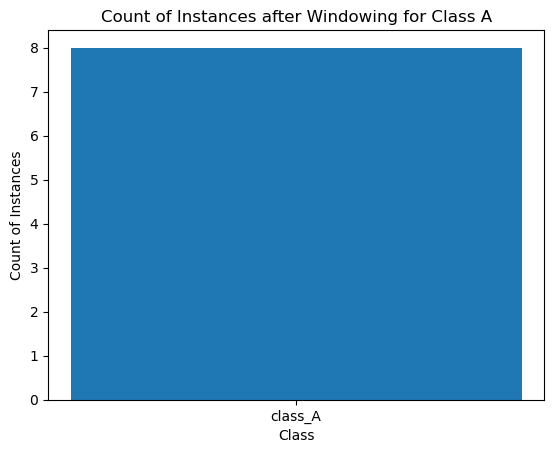

In [6]:
# Step 3: Barplot of Count of Instances after Windowing
window_count = len(windows)

# Plotting the barplot
plt.bar(['class_A'], [window_count])
plt.xlabel('Class')
plt.ylabel('Count of Instances')
plt.title('Count of Instances after Windowing for Class A')
plt.show()

In [7]:
from utils import apply_filter
filtered_windowed_data = {}

# Apply filter and split into windows for each column
for col in columns:
    sample_data = df[col].values
    filtered_data = apply_filter(sample_data, order=5, wn=0.1, filter_type='lowpass')
  
    filtered_windowed_data[col] = windows

sampling_rate = 100  # Define sampling rate in Hz


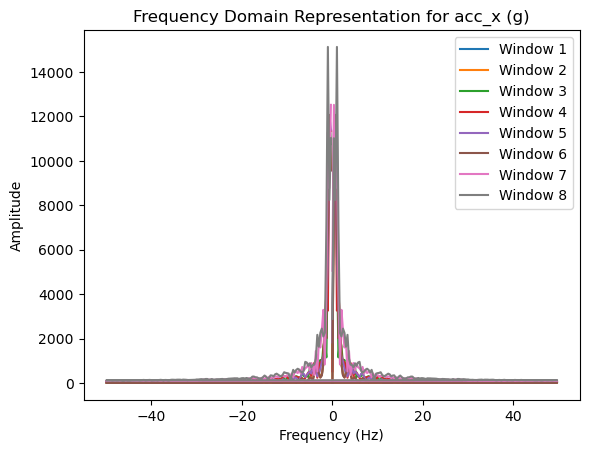

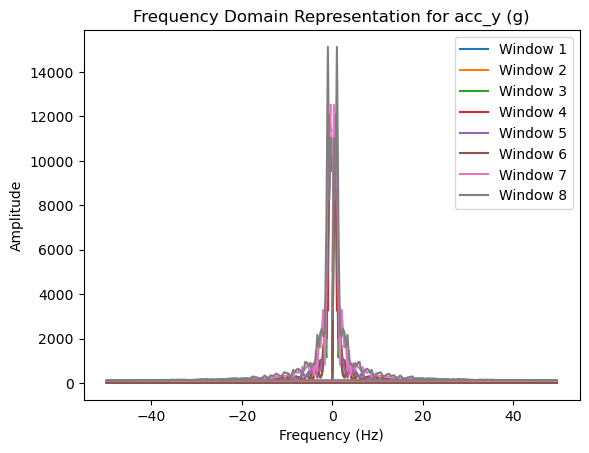

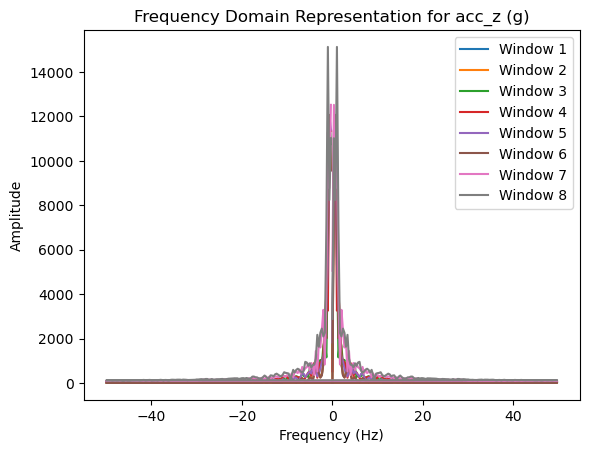

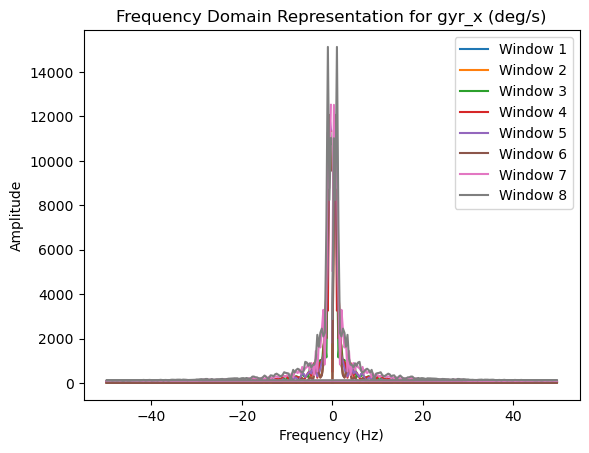

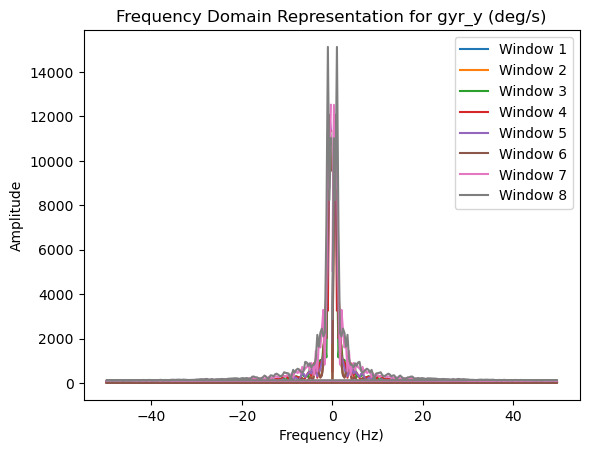

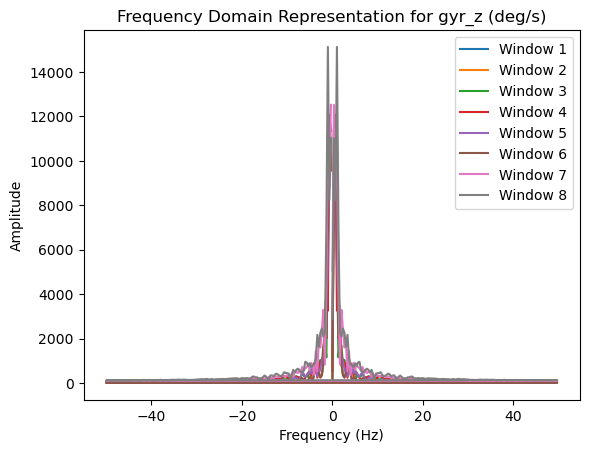

In [8]:
# Step 5: Transform Data into Frequency Domain
def transform_to_frequency_domain(filtered_data, sampling_rate):
    n = len(filtered_data)
    yf = fft(filtered_data)
    xf = fftfreq(n, 1 / sampling_rate)
    return xf, np.abs(yf)

for col, windows in filtered_windowed_data.items():
    for i, window in enumerate(windows):
        xf, yf = transform_to_frequency_domain(window, sampling_rate)
        plt.plot(xf, yf, label=f'Window {i+1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'Frequency Domain Representation for {col}')
    plt.legend()
    plt.show()

In [ ]:
for col in columns:
 
  

    for i in range(len(filtered_windowed_data[col])):
        plt.figure(figsize=(12, 6))

        # Original data
        plt.subplot(2, 1, 1)
        plt.plot(windowed_data[col][i])
        plt.title(f'Original Data for {col} - Window {i+1}')
        plt.xlabel('Sample')
        plt.ylabel('Value')

        # Filtered data
        plt.subplot(2, 1, 2)
        plt.plot(filtered_windowed_data[col][i])
        plt.title(f'Filtered Data for {col} - Window {i+1}')
        plt.xlabel('Sample')
        plt.ylabel('Value')

        plt.tight_layout()
        plt.show()